In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

In [222]:
data = pd.read_csv("dataset/features.csv")
data_cols = np.array(data.columns)
data_cols

array(['letter_slant', 'line_slant', 'margin_slope', 'letter_size',
       'word_spacing', 'personality'], dtype=object)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [224]:
data.isnull().sum()

letter_slant    0
line_slant      0
margin_slope    0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [225]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [226]:
agreeableness = data[data["personality"] == "Agreeableness"]
conscientiousness = data[data["personality"] == "Conscientiousness"]
extraversion = data[data["personality"] == "Extraversion"]
neuroticism = data[data["personality"] == "Neuroticism"]
openness = data[data["personality"] == "Openness"]

In [227]:
agreeableness_x = agreeableness.drop(["personality"], axis=1)
agreeableness_y = agreeableness["personality"]

conscientiousness_x = conscientiousness.drop(["personality"], axis=1)
conscientiousness_y = conscientiousness["personality"]

extraversion_x = extraversion.drop(["personality"], axis=1)
extraversion_y = extraversion["personality"]

neuroticism_x = neuroticism.drop(["personality"], axis=1)
neuroticism_y = neuroticism["personality"]

openness_x = openness.drop(["personality"], axis=1)
openness_y = openness["personality"]

In [228]:
agreeableness_x_train, agreeableness_x_test, agreeableness_y_train, agreeableness_y_test = train_test_split(
    agreeableness_x, agreeableness_y, test_size=0.1, shuffle=True
)

conscientiousness_x_train, conscientiousness_x_test, conscientiousness_y_train, conscientiousness_y_test = train_test_split(
    conscientiousness_x, conscientiousness_y, test_size=0.1, shuffle=True
)

extraversion_x_train, extraversion_x_test, extraversion_y_train, extraversion_y_test = train_test_split(
    extraversion_x, extraversion_y, test_size=0.1, shuffle=True
)

neuroticism_x_train, neuroticism_x_test, neuroticism_y_train, neuroticism_y_test = train_test_split(
    neuroticism_x, neuroticism_y, test_size=0.1, shuffle=True
)

openness_x_train, openness_x_test, openness_y_train, openness_y_test = train_test_split(
    openness_x, openness_y, test_size=0.1, shuffle=True
)

In [229]:
x_train = pd.concat([
    agreeableness_x_train,
    conscientiousness_x_train,
    extraversion_x_train,
    neuroticism_x_train,
    openness_x_train
])

y_train = pd.concat([
    agreeableness_y_train,
    conscientiousness_y_train,
    extraversion_y_train,
    neuroticism_y_train,
    openness_y_train
])

x_test = pd.concat([
    agreeableness_x_test,
    conscientiousness_x_test,
    extraversion_x_test,
    neuroticism_x_test,
    openness_x_test
])

y_test = pd.concat([
    agreeableness_y_test,
    conscientiousness_y_test,
    extraversion_y_test,
    neuroticism_y_test,
    openness_y_test
])

In [230]:
print(f"{x_train.shape, y_train.shape, x_test.shape, y_test.shape}")

((197, 5), (197,), (24, 5), (24,))


In [231]:
x_train.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing
28,-7.0,6.1,-21.5,213.9,16.5
13,-5.0,10.8,-28.1,1204.6,19.0
17,3.0,-1.0,-27.3,52.5,22.0
6,13.0,-5.1,-14.0,788.7,20.0
8,-6.0,7.1,-21.6,899.4,20.5


In [232]:
y_train.head()

28    Agreeableness
13    Agreeableness
17    Agreeableness
6     Agreeableness
8     Agreeableness
Name: personality, dtype: object

In [233]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf

array(['Conscientiousness', 'Openness', 'Agreeableness', 'Agreeableness',
       'Openness', 'Neuroticism', 'Openness', 'Openness', 'Openness',
       'Openness', 'Conscientiousness', 'Openness', 'Openness',
       'Neuroticism', 'Neuroticism', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness'], dtype=object)

In [234]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf = round(accuracy_rf * 100, 2)
print(f"Accuracy for Random Forest Classifier: {accuracy_rf}%")

Accuracy for Random Forest Classifier: 50.0%


In [235]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=8, scoring="accuracy")
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal number of neighbors: {optimal_k}")

Optimal number of neighbors: 61


In [236]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array(['Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness'], dtype=object)

In [237]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn = round(accuracy_knn * 100, 2)
print(f"Accuracy for KNN Classifier: {accuracy_knn}%")

Accuracy for KNN Classifier: 41.67%


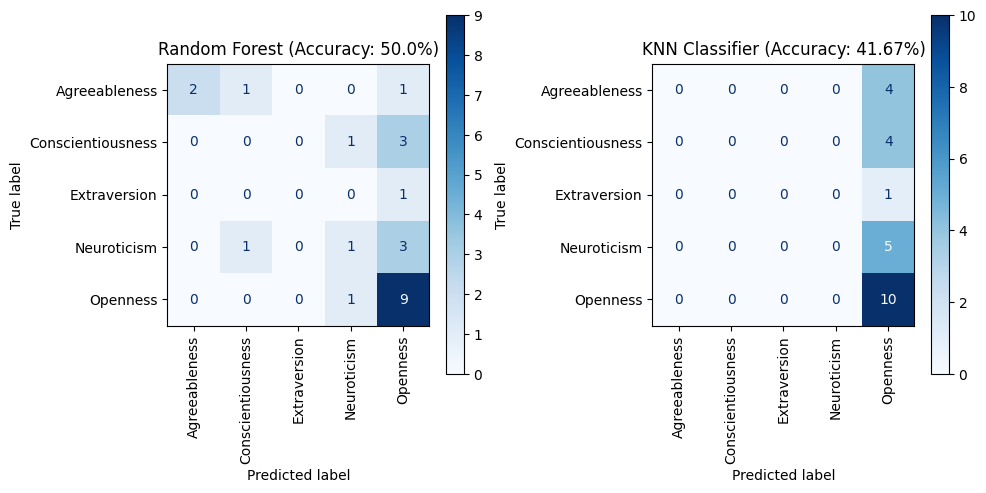

In [238]:
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp1.plot(ax=ax1, xticks_rotation="vertical", cmap="Blues")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp2.plot(ax=ax2, xticks_rotation="vertical", cmap="Blues")

ax1.set_title(f"Random Forest (Accuracy: {accuracy_rf}%)")
ax2.set_title(f"KNN Classifier (Accuracy: {accuracy_knn}%)")

fig.tight_layout()
plt.show()

In [239]:
import joblib
import os

joblib.dump(rf, "./saved_models/random_forest.joblib", compress=3)
print(f"Saved RF model size: {np.round(os.path.getsize('./saved_models/random_forest.joblib') / 1024 / 1024, 3) } MB")

joblib.dump(knn, "./saved_models/knn.joblib", compress=3)
print(f"Saved KNN model size: {np.round(os.path.getsize('./saved_models/knn.joblib') / 1024 / 1024, 3) } MB")

Saved RF model size: 0.227 MB
Saved KNN model size: 0.005 MB


In [240]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.to_csv("./saved_models/train.csv", index=False)

df_test = pd.concat([x_test, y_test], axis=1)
df_test.to_csv("./saved_models/test.csv", index=False)